In [16]:
!pip install pygmo


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.1 MB/s eta 0:00:00a 0:00:01
ERROR: pygmo from https://files.pythonhosted.org/packages/e2/12/090ba61479f60d5177a0048736d09dc028b2d65063ed44cb952df506336f/pygmo-v2.19.0.tar.gz does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [13]:
import pygmo as pg
import torch
# Example Pareto front: A list of 3D points (x, y, z)
pareto_front =     torch.tensor([[-0.5, -0.7, -0.2],[-0.7, -0.5, -0.45]])


# Reference point (should be worse than any point in the Pareto front)
reference_point = [.0, .0, .0]

# Create a hypervolume object
hv = pg.hypervolume(pareto_front)

# Compute the hypervolume w.r.t. the reference point
hypervolume_value = hv.compute(reference_point)

print(f"The dominating hypervolume is: {hypervolume_value}")


The dominating hypervolume is: 0.17749999225139623


In [2]:
import numpy as np

def calculate_3d_hypervolume(pareto_front, reference_point):
    # Sort Pareto front by the first objective (x-axis)
    sorted_front = sorted(pareto_front, key=lambda x: x[0])
    
    # Initialize hypervolume
    hypervolume = 0.0
    
    # Iterate over the Pareto front points
    for i in range(len(sorted_front)):
        if i == 0:
            x_len = reference_point[0] - sorted_front[i][0]
        else:
            x_len = sorted_front[i - 1][0] - sorted_front[i][0]
        
        y_len = reference_point[1] - sorted_front[i][1]
        z_len = reference_point[2] - sorted_front[i][2]
        
        volume = x_len * y_len * z_len
        hypervolume += volume
    
    return hypervolume

# Example Pareto front: a list of 3D points (x, y, z)
pareto_front = np.array([
    [0.5, 0.7, 0], [0.7, 0.5, 0]
])

# Reference point (should be worse than any point in the Pareto front)
reference_point = np.array([1.0, 1.0, 1.0])

# Compute the hypervolume
hypervolume_value = calculate_3d_hypervolume(pareto_front, reference_point)

print(f"The dominating hypervolume is: {hypervolume_value}")


The dominating hypervolume is: 0.006999999999999987


In [13]:
def calculate_dominating_volume_3d(pareto_front, ref_point):
    """
    Calculate the dominating volume of the Pareto front with respect to a reference point in 3D.

    :param pareto_front: Torch tensor of size N*3 containing points in the Pareto front (N points, 3 objectives).
    :param ref_point: Torch tensor of size 3 representing the reference point.
    :return: Dominating volume of the Pareto front in 3D.
    """
    # Sort Pareto front based on the first objective (ascending order)
    sorted_pareto_front = pareto_front[pareto_front[:, 0].argsort()]
    
    # Initialize dominating volume
    dominating_volume = 0.0
    
    # Initialize the upper corner of the volume
    upper_corner = ref_point.clone()
    
    # Iterate through sorted Pareto front
    for point in sorted_pareto_front:
        # Calculate the width, height, and depth of the cuboid
        width = point[0] - upper_corner[0]
        height = point[1] - upper_corner[1]
        depth = point[2] - upper_corner[2]
        
        # If width, height, or depth are negative, it means the point is not dominated in that direction
        # and we should skip this point.
        if width <= 0 or height <= 0 or depth <= 0:
            continue
        
        # Update dominating volume by adding the volume of the cuboid
        dominating_volume += width * height * depth
        
        # Update the upper corner for the next cuboid
        upper_corner[0] = point[0]

    return dominating_volume

# Example usage
import torch

N = 5  # Number of points in the Pareto front
pareto_front = torch.tensor([[7, 8, 9]])  # Random points in 3D space
ref_point = torch.tensor([.0, .0, .0])  # Reference point in 3D space

dom_volume = calculate_dominating_volume_3d(pareto_front, ref_point)
print("Dominating volume in 3D:", dom_volume)


Dominating volume in 3D: tensor(504.)


In [14]:



import numpy as np
from scipy.spatial import ConvexHull

def dominating_volume(points):
    """Calculates the 3D dominating volume of a set of points."""

    hull = ConvexHull(points)
    return hull.volume

if __name__ == "__main__":
    # Example points (replace with your own data)
    points = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [2, 3, 4]])

    volume = dominating_volume(points)
    print("Dominating volume:", volume)

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1636645736  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width  6  Error-roundoff 1.2e-14  _one-merge 8.7e-14
  _near-inside 4.4e-13  Visible-distance 2.5e-14  U-max-coplanar 2.5e-14
  Width-outside 5e-14  _wide-facet 1.5e-13  _maxoutside 1e-13

precision problems (corrected unless 'Q0' or an error)
      4 degenerate hyperplanes recomputed with gaussian elimination
      4 nearly singular or axis-parallel hyperplanes
      4 zero divisors during back substitute
      4 zero divisors during gaussian elimination

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p3(v4):     2     3     4
- p1(v3):     4     5     6
- p2(v2):     7     8     9
- p0(v1):     1     2     3

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 1.2e-14.  The center point, facets and distances
to the center point are as follows:

center point      3.5      4.5      5.5

facet p1 p2 p0 distance= -4.4e-16
facet p3 p2 p0 distance= -4.4e-16
facet p3 p1 p0 distance= -4.4e-16
facet p3 p1 p2 distance= -4.4e-16

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:         1         7  difference=    6
  1:         2         8  difference=    6
  2:         3         9  difference=    6

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 1.2e-14.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


In [10]:
0.9*0.8*0.2

0.14400000000000002

In [8]:
pareto_front

tensor([[0.3656, 0.0426, 0.8780],
        [0.3172, 0.8009, 0.8128],
        [0.8329, 0.3663, 0.2522],
        [0.8224, 0.9843, 0.6153],
        [0.9936, 0.8647, 0.2721]])

In [1]:
a = {'good':2, 'bad':3}

In [2]:
len(a)

2

In [18]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

device = "cpu"
model_id = "openai-community/gpt2-large"
model = GPT2LMHeadModel.from_pretrained(model_id).to(device)
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)

In [19]:
from datasets import load_dataset

test = load_dataset("wikitext", "wikitext-2-raw-v1", split="test")
encodings = tokenizer("\n\n".join(test["text"]), return_tensors="pt")

Generating validation split: 100%|██████████| 3760/3760 [00:00<00:00, 389108.88 examples/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (287644 > 1024). Running this sequence through the model will result in indexing errors


In [24]:
import torch
from tqdm import tqdm

max_length = model.config.n_positions
stride = 5120
seq_len = encodings.input_ids.size(1)

nlls = []
prev_end_loc = 0
for begin_loc in tqdm(range(0, seq_len, stride)):
    end_loc = min(begin_loc + max_length, seq_len)
    trg_len = end_loc - prev_end_loc  # may be different from stride on last loop
    input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:, :-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)

        # loss is calculated using CrossEntropyLoss which averages over valid labels
        # N.B. the model only calculates loss over trg_len - 1 labels, because it internally shifts the labels
        # to the left by 1.
        neg_log_likelihood = outputs.loss

    nlls.append(neg_log_likelihood)

    prev_end_loc = end_loc
    if end_loc == seq_len:
        break

ppl = torch.exp(torch.stack(nlls).mean())

 98%|█████████▊| 56/57 [02:58<00:03,  3.19s/it]


In [26]:
nlls

[tensor(2.4563),
 tensor(3.2130),
 tensor(2.8298),
 tensor(3.1584),
 tensor(2.8602),
 tensor(3.0615),
 tensor(3.4675),
 tensor(2.8435),
 tensor(3.3761),
 tensor(3.2331),
 tensor(3.3443),
 tensor(2.6687),
 tensor(2.5851),
 tensor(2.6306),
 tensor(2.2679),
 tensor(2.2570),
 tensor(3.4688),
 tensor(3.1651),
 tensor(3.1864),
 tensor(2.9431),
 tensor(2.8955),
 tensor(2.7686),
 tensor(2.8608),
 tensor(3.1048),
 tensor(3.1405),
 tensor(2.4870),
 tensor(2.5494),
 tensor(2.4721),
 tensor(2.9212),
 tensor(3.0260),
 tensor(2.8389),
 tensor(3.2759),
 tensor(2.5990),
 tensor(2.6903),
 tensor(2.9425),
 tensor(3.5460),
 tensor(3.0721),
 tensor(2.6845),
 tensor(3.0366),
 tensor(2.9020),
 tensor(3.0449),
 tensor(3.5175),
 tensor(2.8849),
 tensor(2.8323),
 tensor(3.3599),
 tensor(2.9644),
 tensor(3.0535),
 tensor(2.7922),
 tensor(3.0178),
 tensor(3.0856),
 tensor(2.6764),
 tensor(2.9691),
 tensor(2.5791),
 tensor(1.8262),
 tensor(3.3218),
 tensor(2.8275),
 tensor(2.8636)]

In [25]:
ppl

tensor(18.5434)

In [17]:
from transformers import pipeline

# Load the TextAttack CoLA RoBERTa model
classifier = pipeline("text-classification", model="textattack/roberta-base-CoLA")

# Test with a sentence
sentence = "afha;i apoifjap efn; paoijfjnpe f; p;infaie f"
result = classifier(sentence)

print(result)

Some weights of the model checkpoint at textattack/roberta-base-CoLA were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'LABEL_1', 'score': 0.6973828673362732}]


In [1]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForMaskedLM, GPT2LMHeadModel, AutoModelForSequenceClassification, GPT2Tokenizer
from typing import List, Dict, Optional, Tuple, Union, Any
from collections import defaultdict
from rlprompt.rewards import BaseReward

SUPPORTED_LEFT_TO_RIGHT_LMS = ['distilgpt2', 'gpt2', 'gpt2-medium',
                               'gpt2-large', 'gpt2-xl']
SUPPORTED_MASK_LMS = ['distilroberta-base', 'roberta-base', 'roberta-large']

# def perplexity_calculate2(input_text):
#     model_name = "gpt2"
#     tokenizer = GPT2Tokenizer.from_pretrained(model_name)
#     model = GPT2LMHeadModel.from_pretrained(model_name)

#     # Set the model to evaluation mode
#     model.eval()

#     # Tokenize the input
#     input_ids = tokenizer.encode(input_text, return_tensors="pt")

#     # Get the model's output (logits and loss)
#     with torch.no_grad():
#         outputs = model(input_ids, labels=input_ids)
#         loss = outputs.loss

#     # Calculate perplexity
#     perplexity = torch.exp(loss)
#     return perplexity


# model_name_p = "textattack/roberta-base-CoLA"
# tokenizer_p = AutoTokenizer.from_pretrained(model_name_p)
# model_p = AutoModelForSequenceClassification.from_pretrained(model_name_p)
# model_p.eval()

def perplexity_calculate(input_text, model_name_p, model_p, tokenizer_p):

    
    if model_name_p == "textattack/roberta-base-CoLA":
        # Input sentence
        sentence = input_text

        # Tokenize input
        inputs = tokenizer_p(sentence, return_tensors="pt")
        with torch.no_grad():
            outputs = model_p(**inputs)

            # Get prediction (logits)
            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=-1)

        # Probability that the sentence is acceptable
        acceptability_score = probabilities[0][1].item()
        return torch.tensor(acceptability_score)
    
    elif model_name_p == "gpt2":
        input_ids = tokenizer_p.encode(input_text, return_tensors="pt")

        # Get the model's output (logits and loss)
        with torch.no_grad():
            outputs = model_p(input_ids, labels=input_ids)
            loss = outputs.loss

        # Calculate perplexity
        perplexity = torch.log(loss)
        return perplexity

/global/homes/g/gzhao27/anaconda3/envs/Prompt/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name_p = "textattack/roberta-base-CoLA"
tokenizer_p = AutoTokenizer.from_pretrained(model_name_p)
model_p = AutoModelForSequenceClassification.from_pretrained(model_name_p)
model_p.eval()

Some weights of the model checkpoint at textattack/roberta-base-CoLA were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [3]:
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

In [4]:
with open("/pscratch/sd/g/gzhao27/rl-prompt/examples/few-shot-classification/string_record.txt", 'r') as f:
    lines = f.readlines()

In [5]:
value1 = []
value2 = []
i = 0
for line in lines:
    v1 = perplexity_calculate(line, model_name_p, model_p, tokenizer_p)
    v2 = perplexity_calculate(line, model_name, model, tokenizer)
    value1.append(v1)
    value2.append(v2)
    i+=1
    if i > 1000:
        break

In [6]:
value3 = []
for a in value2:
    value3.append(torch.exp(a))

In [7]:
value4 = []
for a in value3:
    value4.append(torch.exp(a))

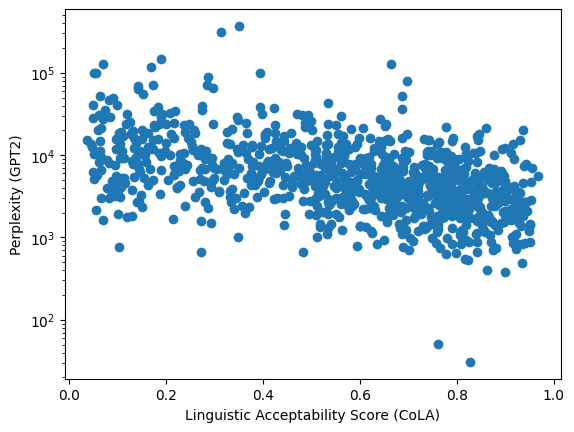

In [13]:
import matplotlib.pyplot as plt
plt.scatter(value1, value4)
plt.xlabel('Linguistic Acceptability Score (CoLA)')
plt.ylabel('Perplexity (GPT2)')
plt.yscale('log')
# plt.ylim(0, 00)

In [17]:
from scipy.stats import spearmanr

# Calculate Spearman's Rank Correlation Coefficient
corr_coefficient, p_value = spearmanr(value1, value4)

# Print results
print("Spearman's Rank Correlation Coefficient:", corr_coefficient)
print("p-value:", p_value)

Spearman's Rank Correlation Coefficient: -0.4739961656844198
p-value: 3.3317966863192103e-57


In [25]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(value1, value4)
correlation = np.corrcoef(value1, value4)[0, 1]
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

Correlation coefficient: -0.26829822221327715
p-value: 5.7806314e-18


In [16]:
!pip install scipy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 225.2 MB/s eta 0:00:00a 0:00:01


In [14]:
plt.savefig('LAS-perplexity.pdf', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [26]:
a = {'a':3}

In [27]:
bool(a)

True

In [21]:
a[2] = 2

In [22]:
b

tensor([2.0000, 0.4197, 0.6587, 0.3655, 0.6452])

In [19]:
b = a.clone()

In [16]:
my_dict = {'key1': 'value1', 'key2': 'value2'}
object1_value, object2_value = my_dict.values()

In [17]:
key1, key2 = my_dict.keys()

In [18]:
key1

'key1'

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "textattack/roberta-base-CoLA"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Input sentence
sentence = "METHODSpawnrolog)</ condem"

# Tokenize input
inputs = tokenizer(sentence, return_tensors="pt")
outputs = model(**inputs)

# Get prediction (logits)
logits = outputs.logits
probabilities = torch.softmax(logits, dim=-1)

# Probability that the sentence is acceptable
acceptability_score = probabilities[0][1].item()
print(f"Grammatical correctness score: {acceptability_score:.4f}")


Some weights of the model checkpoint at textattack/roberta-base-CoLA were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Grammatical correctness score: 0.1069


In [4]:
def perplexity_calculate(input_text):

    model_name = "textattack/roberta-base-CoLA"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    # Input sentence
    sentence = input_text

    # Tokenize input
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)

    # Get prediction (logits)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=-1)

    # Probability that the sentence is acceptable
    acceptability_score = probabilities[0][1].item()
    return acceptability_score

In [7]:
perplexity_calculate('aerjnje i;qeir h dakfhqei')

Some weights of the model checkpoint at textattack/roberta-base-CoLA were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0.5012895464897156

In [1]:
import torch
from transformers import RobertaForMaskedLM, AutoTokenizer, AutoConfig

class Perplexity(object):
    def __init__(self, model="roberta-base", device="cuda"):
        assert model, "The model must not be None"
        self.device = torch.device('cuda')
        pretrained_config = AutoConfig.from_pretrained(model)

        self.tokenizer = AutoTokenizer.from_pretrained(model)
        self.mlm = RobertaForMaskedLM(pretrained_config).to(self.device)

    def calculate_perplexity(self, prompt):
        inputs = self.tokenizer(
            str(prompt), return_tensors="pt", truncation=True, padding=True
        )
        inputs = inputs.to(self.device)
        with torch.no_grad():
            outputs = self.mlm(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
            # perplexity = torch.exp(loss)
            perplexity = torch.exp(loss / inputs["input_ids"].size(1))

        return perplexity.item()

/global/homes/g/gzhao27/anaconda3/envs/Prompt/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
pe = Perplexity()
perplexity_calculate = pe.calculate_perplexity

In [34]:
!pip install optimum[onnxruntime-gpu]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 12.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 205.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 269.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 316.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 332.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.7/453.7 kB 375.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 393.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 318.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 326.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 323.4 MB/s eta 0:00:00
   ━━━━━━━━

In [51]:
from transformers import AutoTokenizer
from optimum.onnxruntime import ORTModelForSequenceClassification
from optimum.pipelines import pipeline

# load tokenizer and model weights
tokenizer = AutoTokenizer.from_pretrained('Deepchecks/parrot_fluency_model_onnx')
model = ORTModelForSequenceClassification.from_pretrained('Deepchecks/parrot_fluency_model_onnx')

# prepare the pipeline and generate inferences
user_inputs = ['Natural language processing is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence.',
               'Pass on what you have learned. Strength, mastery, hmm… but weakness, folly, failure, also. Yes, failure, most of all. The greatest teacher, failure is.',
               'Pros wonderful']
pip = pipeline(task='text-classification', model=model, tokenizer=tokenizer, device=torch.device('cpu'), accelerator="ort")
res = pip(user_inputs, batch_size=64, truncation="only_first")
print(res)


[{'label': 'LABEL_1', 'score': 0.9684914350509644}, {'label': 'LABEL_1', 'score': 0.7473592758178711}, {'label': 'LABEL_1', 'score': 0.6991557478904724}]


In [9]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import math

# Load pre-trained model and tokenizer

def perplexity_calculate(input_text):
    model_name = "gpt2"
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)

    # Set the model to evaluation mode
    model.eval()

    # Tokenize the input
    input_ids = tokenizer.encode(input_text, return_tensors="pt")

    # Get the model's output (logits and loss)
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss

    # Calculate perplexity
    perplexity = torch.exp(loss)
    print(f"Perplexity: {perplexity.item()}")


In [14]:
prlist = ['Square', 'Game', 'Quality', 'ĠIn', 'Credit']
" ".join([token.replace('Ġ', '') for token in prlist])

'Square Game Quality In Credit'

In [12]:
perplexity_calculate('Bytes Zero Share Alert Leader')

Perplexity: 39076.05078125


In [6]:
perplexity_calculate('Pros wonderful')

15.370862007141113

In [18]:
perplexity_calculate('I like you so much')

4.820967197418213

In [10]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

input_text = "Once upon a time"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate text with sampling
output = model.generate(input_ids, max_length=50, do_sample=True, top_k=0)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time there used to be a separate society for Sylph, Sylvanas, Azmodan, Echargerated Kilrathi, zenkins and nature mages. Within that latter group, however, there is a split as well about


In [1]:
yx = 3

In [2]:
import torch
z = torch.tensor(12)

In [1]:
import torch
losses1 = torch.tensor([])

In [9]:
torch.tensor(0.0, requires_grad=True).grad

In [4]:
z.to(z.device)

tensor(12)

In [9]:
import torch

def pareto_dominant_volume(sample_points, reference_point):
    """
    Calculate the Pareto dominant volume of sample points with respect to a reference point.
    
    Args:
    - sample_points (torch.Tensor): Tensor of size N*2 containing N sample points.
    - reference_point (torch.Tensor): Tensor of size 2 containing the reference point.
    
    Returns:
    - float: Pareto dominant volume.
    """
    # Calculate the number of sample points
    num_points = sample_points.size(0)
    
    # Calculate the number of dimensions
    num_dimensions = sample_points.size(1)
    
    # Initialize a counter for dominated points
    dominated_count = 0
    
    # Iterate through each sample point
    for i in range(num_points):
        # Check if the sample point dominates the reference point
        if torch.all(sample_points[i] <= reference_point):
            # Increment the counter for dominated points
            dominated_count += 1
    
    # Calculate the ratio of dominated points to total points
    dominance_ratio = dominated_count / num_points
    
    # Calculate the Pareto dominant volume (area in 2D)
    pareto_volume = dominance_ratio * (reference_point[0] - sample_points[:, 0].min()) * (reference_point[1] - sample_points[:, 1].min())
    
    return pareto_volume

# Example usage:
sample_points = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
reference_point = torch.tensor([7.0, 8.0])

pareto_volume = pareto_dominant_volume(sample_points, reference_point)
print("Pareto dominant volume:", pareto_volume.item())


Pareto dominant volume: 36.0


In [13]:

import array
import random
import numpy as np

# Example Pareto front (list of solutions with two objectives)
pareto_front = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

# Function to calculate hypervolume indicator
def hypervolume_indicator(pareto_front, ref_point):
    """
    Calculate hypervolume indicator for a Pareto front and reference point.
    
    :param pareto_front: List of Pareto optimal solutions.
    :param ref_point: Reference point for hypervolume calculation.
    :return: Hypervolume indicator value.
    """
    # Convert pareto front and reference point to numpy arrays
    pareto_front = np.array(pareto_front)
    ref_point = np.array(ref_point)
    
    # Sort Pareto front based on first objective (ascending order)
    pareto_front = pareto_front[np.argsort(pareto_front[:, 0])]
    print(pareto_front)
    # Initialize hypervolume
    hypervolume = 0.0
    
    # Iterate through solutions in Pareto front
    for i in range(len(pareto_front)):
        # Calculate hypervolume contribution of current solution
        if i == 0:
            hypervolume += (ref_point[0] - pareto_front[i][0]) * (ref_point[1] - pareto_front[i][1])
        else:
            hypervolume += (pareto_front[i-1][0] - pareto_front[i][0]) * (ref_point[1] - pareto_front[i][1])
    
    return hypervolume

# Reference point for hypervolume calculation (maximum values for each objective)
reference_point = (6, 7)

# Calculate hypervolume indicator
hv = hypervolume_indicator(pareto_front, reference_point)
print("Hypervolume Indicator:", hv)


[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]
Hypervolume Indicator: 15.0


In [10]:
sample_points = torch.tensor([[1.0, 2.0], [2.0, 1.0], [5.0, 6.0]])
reference_point = torch.tensor([7.0, 8.0])

pareto_volume = pareto_dominant_volume(sample_points, reference_point)
print("Pareto dominant volume:", pareto_volume.item())

Pareto dominant volume: 42.0


In [2]:
import torch

def pareto_dominance_volume(sample_points, reference_point):
    # Calculate the minimum and maximum x and y values
    min_x = torch.min(sample_points[:, 0])
    max_x = torch.max(sample_points[:, 0])
    min_y = torch.min(sample_points[:, 1])
    max_y = torch.max(sample_points[:, 1])
    
    # Calculate the area dominated by the sample points and also dominating the reference point
    dominate_volume = (max_x - min_x) * (max_y - min_y)
    
    # Check if the reference point is dominated by the sample points
    if (reference_point[0] >= min_x) and (reference_point[0] <= max_x) and (reference_point[1] >= min_y) and (reference_point[1] <= max_y):
        dominate_volume -= (reference_point[0] - min_x) * (reference_point[1] - min_y)
    
    return dominate_volume

In [3]:
pareto_dominant_volume(sample_points, reference_point)

tensor(36.)

In [5]:
import torch

def pareto_dominant_volume(sample_points, reference_point):
    """
    Calculate the Pareto dominant volume of sample points with respect to a reference point.
    
    Args:
    - sample_points (torch.Tensor): Tensor of size N*2 containing N sample points.
    - reference_point (torch.Tensor): Tensor of size 2 containing the reference point.
    
    Returns:
    - float: Pareto dominant volume.
    """
    # Calculate the number of sample points
    num_points = sample_points.size(0)
    
    # Calculate the number of dimensions
    num_dimensions = sample_points.size(1)
    
    # Initialize a counter for dominating points
    dominating_count = 0
    
    # Iterate through each sample point
    for i in range(num_points):
        # Check if the sample point is dominated by the reference point
        if torch.all(sample_points[i] <= reference_point):
            # Increment the counter for dominating points
            dominating_count += 1
    
    # Calculate the ratio of dominating points to total points
    dominance_ratio = dominating_count / num_points
    
    # Calculate the Pareto dominant volume (area in 2D)
    pareto_volume = dominance_ratio * (reference_point[0] - sample_points[:, 0].min()) * (reference_point[1] - sample_points[:, 1].min())
    
    return pareto_volume

# Example usage:
sample_points = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
reference_point = torch.tensor([7.0, 8.0])

pareto_volume = pareto_dominant_volume(sample_points, reference_point)
print("Pareto dominant volume:", pareto_volume.item())


Pareto dominant volume: 36.0


In [6]:
import torch

def pareto_dominate_volume(sample_points, reference_point):
  """
  Calculates the Pareto dominate volume of sample points with respect to a reference point.

  Args:
      sample_points: A torch tensor of size (N, 2) representing the sample points.
      reference_point: A torch tensor of size (2) representing the reference point.

  Returns:
      A float representing the Pareto dominate volume.
  """
  # Check for valid input shapes
  if sample_points.dim() != 2 or sample_points.shape[1] != 2:
    raise ValueError("sample_points must be a tensor of size (N, 2)")
  if reference_point.dim() != 1 or reference_point.shape[0] != 2:
    raise ValueError("reference_point must be a tensor of size (2)")

  # Calculate the number of dimensions (objectives)
  num_objectives = sample_points.shape[1]

  # Calculate boolean mask for points dominating the reference point in all dimensions
  dominates_reference = torch.all(sample_points < reference_point, dim=1)

  # Calculate boolean mask for points not dominated by any other sample point
  not_dominated = torch.ones(sample_points.shape[0], dtype=bool)
  for i in range(sample_points.shape[0]):
    current_point = sample_points[i]
    other_points = torch.cat((sample_points[:i], sample_points[i+1:]), dim=0)
    not_dominated[i] = torch.any(~torch.all(other_points <= current_point, dim=1))

  # Calculate the final mask for points in the Pareto dominate volume
  pareto_dominate = dominates_reference & not_dominated

  # Calculate the area (assuming minimization problems) by summing dominated objective differences
  dominate_volume = torch.sum(torch.where(pareto_dominate, reference_point - sample_points, torch.zeros_like(sample_points)))

  return dominate_volume.item()  # Return the scalar value


In [8]:
pareto_dominate_volume(sample_points, reference_point)

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [14]:
import torch

def find_pareto_front(samples):
    """
    Find the Pareto front of given sample points.
    
    :param samples: Torch tensor of size N*2 containing sample points (N samples, 2 objectives).
    :return: List of indices of points in the Pareto front.
    """
    pareto_front = []
    dominated_by = torch.zeros(samples.size(0), dtype=torch.bool)
    
    for i, point1 in enumerate(samples):
        if not dominated_by[i]:
            pareto_front.append(i)
            for j, point2 in enumerate(samples):
                if i != j:
                    if torch.all(point1 <= point2):
                        dominated_by[j] = True
                    elif torch.all(point1 >= point2):
                        dominated_by[i] = True
                        pareto_front.remove(i)
                        break
                        
    return pareto_front

# Example sample points (torch tensor of size N*2)
samples = torch.tensor([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

# Find Pareto front
pareto_front_indices = find_pareto_front(samples)

# Print Pareto front
pareto_front = samples[pareto_front_indices]
print("Pareto Front:")
print(pareto_front)

Pareto Front:
tensor([[1, 2]])


In [41]:
import torch

def find_pareto_front(samples):
    """
    Find the Pareto front of given sample points.
    
    :param samples: Torch tensor of size N*2 containing sample points (N samples, 2 objectives).
    :return: List of indices of points in the Pareto front.
    """
    pareto_front = []
    dominated_by = torch.zeros(samples.size(0), dtype=torch.bool)
    
    for i, point1 in enumerate(samples):
        if not dominated_by[i]:
            pareto_front.append(i)
            for j, point2 in enumerate(samples):
                if i != j:
                    if torch.all(point1 >= point2):
                        dominated_by[j] = True
                    elif torch.all(point1 <= point2):
                        dominated_by[i] = True
                        pareto_front.remove(i)
                        break
    PF = samples[pareto_front]
    return PF

def calculate_dominating_volume(pareto_front, ref_point):
    """
    Calculate the dominating volume of the Pareto front with respect to a reference point.
    
    :param pareto_front: Torch tensor of size N*2 containing points in the Pareto front (N points, 2 objectives).
    :param ref_point: Torch tensor of size 2 representing the reference point.
    :return: Dominating volume of the Pareto front.
    """
    # Sort Pareto front based on the first objective (ascending order)
    sorted_pareto_front = pareto_front[pareto_front[:, 0].argsort()]
    
    # Initialize dominating volume
    dominating_volume = 0.0
    
    # Initialize the right upper corner of the rectangle
    right_upper_corner = ref_point.clone()
    print(sorted_pareto_front)
    # Iterate through sorted Pareto front
    for point in sorted_pareto_front:
        # Calculate the width and height of the rectangle
        width = right_upper_corner[0] - point[0]
        height = right_upper_corner[1] - point[1]
        
        # Update dominating volume by adding the area of the rectangle
        dominating_volume += width * height
        
        # Update the right upper corner for the next rectangle
        right_upper_corner[0] = point[0]
        print(right_upper_corner)
    
    return dominating_volume

# Example sample points (torch tensor of size N*2)
samples = torch.tensor([[1, 2], [2, 1], [2, 1], [1.2, 1.7], [1.5, 1.5]])

# Find Pareto front
pareto_front_indices = find_pareto_front(samples)
# pareto_front = samples[pareto_front_indices]

# Reference point (torch tensor of size 2)
reference_point =torch.tensor([.0, .0])

# Calculate dominating volume
dominating_volume = calculate_dominating_volume(pareto_front, reference_point)

# Print dominating volume
print("Dominating Volume:", dominating_volume)


tensor([[1.0000, 2.0000],
        [1.2000, 1.7000],
        [1.5000, 1.5000],
        [2.0000, 1.0000]])
tensor([1., 0.])
tensor([1.2000, 0.0000])
tensor([1.5000, 0.0000])
tensor([2., 0.])
Dominating Volume: tensor(3.2900)


In [37]:
import torch

def find_pareto_front(samples):
    """
    Find the Pareto front of given sample points.
    
    :param samples: Torch tensor of size N*2 containing sample points (N samples, 2 objectives).
    :return: Pareto front as a torch tensor.
    """
    pareto_front = []
    dominated_by = torch.zeros(samples.size(0), dtype=torch.bool)
    
    for idx, point1 in enumerate(samples):
        if not dominated_by[idx]:
            pareto_front.append(idx)
            for j, point2 in enumerate(samples):
                if idx != j:
                    if torch.all(point1 <= point2):
                        dominated_by[j] = True
                    elif torch.all(point1 >= point2):
                        dominated_by[idx] = True
                        pareto_front.remove(idx)
                        break
    pareto_front_tensor = samples[pareto_front]
    return pareto_front_tensor

def calculate_dominating_volume(pareto_front, ref_point):
    """
    Calculate the dominating volume of the Pareto front with respect to a reference point.
    
    :param pareto_front: Torch tensor of size N*2 containing points in the Pareto front (N points, 2 objectives).
    :param ref_point: Torch tensor of size 2 representing the reference point.
    :return: Dominating volume of the Pareto front.
    """
    # Sort Pareto front based on the first objective (ascending order)
    sorted_pareto_front = pareto_front[pareto_front[:, 0].argsort()]
    
    # Initialize dominating volume
    dominating_volume = 0.0
    
    # Initialize the upper left corner of the rectangle
    upper_left_corner = ref_point.clone()
    
    # Iterate through sorted Pareto front
    for point in sorted_pareto_front:
        # Calculate the width and height of the rectangle
        width = upper_left_corner[0] - point[0]
        height = upper_left_corner[1] - point[1]
        
        # Update dominating volume by adding the area of the rectangle
        dominating_volume += width * height
        
        # Update the upper left corner for the next rectangle
        upper_left_corner[1] = point[1]
    
    return dominating_volume

# Example sample points (torch tensor of size N*2)
samples = torch.tensor([[1, 2], [2, 1], [3, 3], [1.2, 1.7], [1.5, 1.5]])

# Find Pareto front
pareto_front_tensor = find_pareto_front(samples)

# Reference point (torch tensor of size 2)
reference_point = torch.tensor([5.0, 5.0])

# Calculate dominating volume
dominating_volume = calculate_dominating_volume(pareto_front_tensor, reference_point)

# Print dominating volume
print("Dominating Volume:", dominating_volume)


Dominating Volume: tensor(15.3400)


In [20]:
pareto_front_indices = find_pareto_front(samples)
pareto_front = samples[pareto_front_indices]


In [26]:
pareto_front[pareto_front[:, 0].argsort()]

tensor([[1.0000, 2.0000],
        [1.2000, 1.7000],
        [1.5000, 1.5000],
        [2.0000, 1.0000]])